# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
query_url = url + "appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    print(city_url)
    print(type(city_url))
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_request = requests.get(city_url)
        city_weather = city_weather_request.json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

    # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=cidreira
<class 'str'>
Processing Record 1 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=taolanaro
<class 'str'>
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=punta arenas
<class 'str'>
Processing Record 3 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=ghanzi
<class 'str'>
Processing Record 4 of Set 1 | ghanzi
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=dakar
<class 'str'>
Processing Record 5 of Set 1 | dakar
http://api.openweathermap.org/data/2.5/weather?appid=48d2d258e076db7e79aee4f358183507&q=airai
<class 'str'>
Processing Record 6 of Set 1 | airai
http://api.o

In [4]:
city_data

[{'City': 'cidreira',
  'Lat': -30.1811,
  'Lng': -50.2056,
  'Max Temp': 298.18,
  'Humidity': 80,
  'Cloudiness': 0,
  'Wind Speed': 6.64,
  'Country': 'BR',
  'Date': 1676241085},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 285.21,
  'Humidity': 50,
  'Cloudiness': 20,
  'Wind Speed': 10.8,
  'Country': 'CL',
  'Date': 1676241086},
 {'City': 'ghanzi',
  'Lat': -21.5667,
  'Lng': 21.7833,
  'Max Temp': 296.39,
  'Humidity': 36,
  'Cloudiness': 90,
  'Wind Speed': 3.1,
  'Country': 'BW',
  'Date': 1676241086},
 {'City': 'dakar',
  'Lat': 14.6937,
  'Lng': -17.4441,
  'Max Temp': 294.64,
  'Humidity': 88,
  'Cloudiness': 97,
  'Wind Speed': 3.09,
  'Country': 'SN',
  'Date': 1676240940},
 {'City': 'airai',
  'Lat': -8.9266,
  'Lng': 125.4092,
  'Max Temp': 289.96,
  'Humidity': 91,
  'Cloudiness': 98,
  'Wind Speed': 1.73,
  'Country': 'TL',
  'Date': 1676241087},
 {'City': 'tortoli',
  'Lat': 39.9256,
  'Lng': 9.6572,
  'Max Temp': 280.05,
  'Humidity':

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE


# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.1811,-50.2056,298.18,80,0,6.64,BR,1676241085
1,punta arenas,-53.1500,-70.9167,285.21,50,20,10.80,CL,1676241086
2,ghanzi,-21.5667,21.7833,296.39,36,90,3.10,BW,1676241086
3,dakar,14.6937,-17.4441,294.64,88,97,3.09,SN,1676240940
4,airai,-8.9266,125.4092,289.96,91,98,1.73,TL,1676241087


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,298.18,80,0,6.64,BR,1676241085
1,punta arenas,-53.1500,-70.9167,285.21,50,20,10.80,CL,1676241086
2,ghanzi,-21.5667,21.7833,296.39,36,90,3.10,BW,1676241086
3,dakar,14.6937,-17.4441,294.64,88,97,3.09,SN,1676240940
4,airai,-8.9266,125.4092,289.96,91,98,1.73,TL,1676241087


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

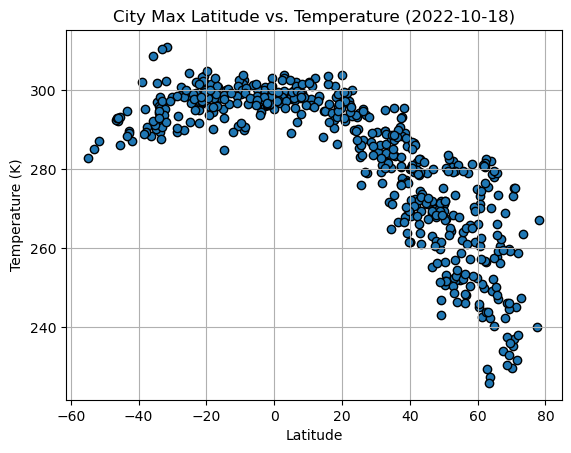

In [20]:
lat_temp_fig = plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (K)')
plt.grid()

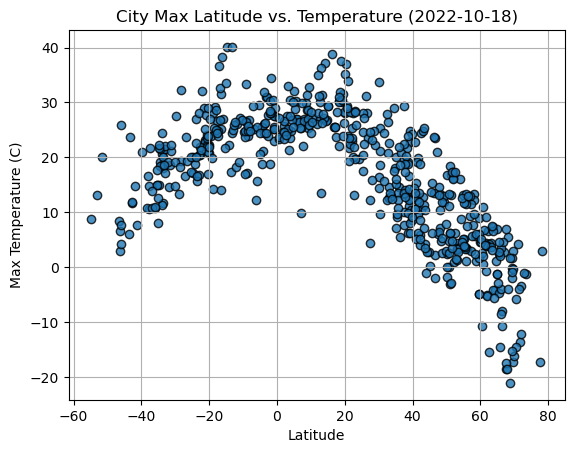

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

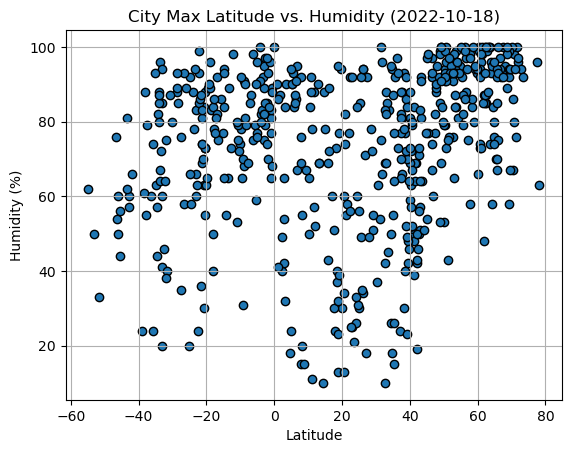

In [24]:
lat_hum_fig = plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

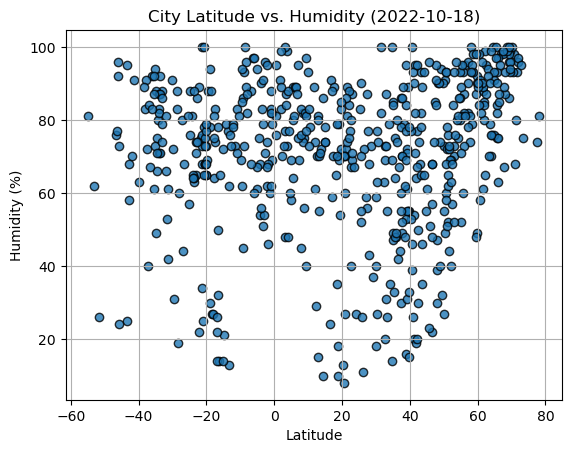

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

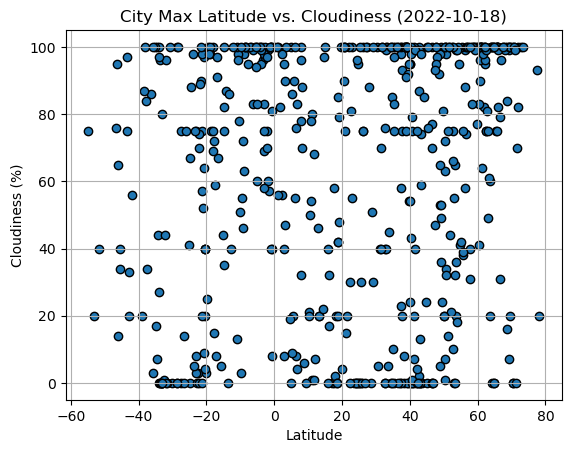

In [25]:
lat_cloud_fig = plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

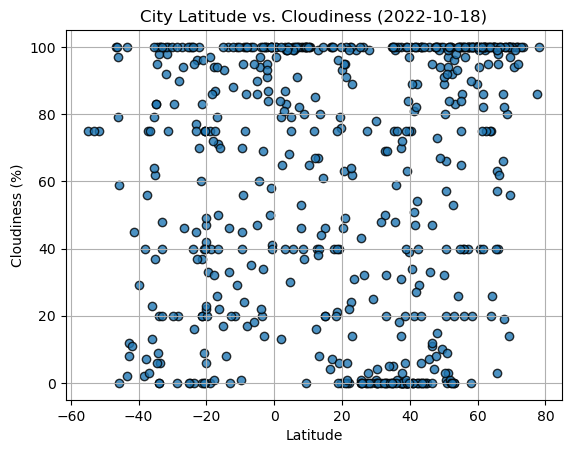

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [27]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

#### Latitude vs. Wind Speed Plot

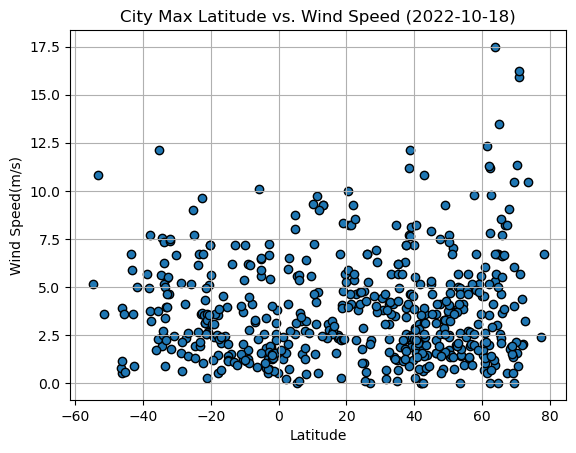

In [29]:
lat_wind_fig = plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()

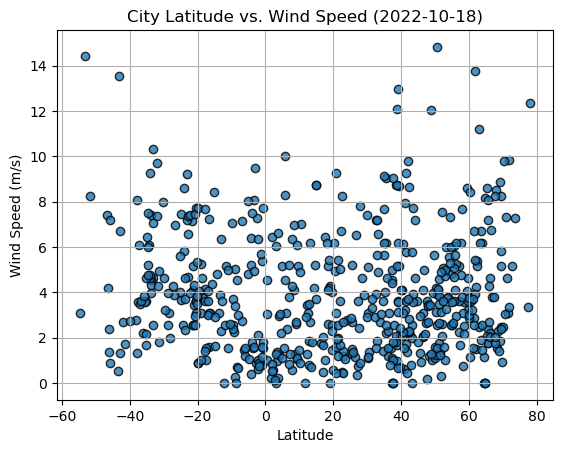

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x_values,y_values)
    ax.plot(x_values,regress_values,"r-")
    annotation = ax.annotate(line_eq,xy=(0.05, 0.90), xycoords='axes fraction',fontsize=15,color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    #plt.show()
    return ax,line_eq,f,annotation

The r-squared is: 0.004149605465922929


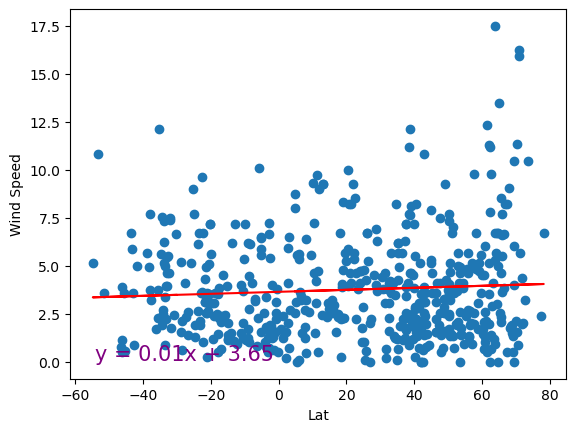

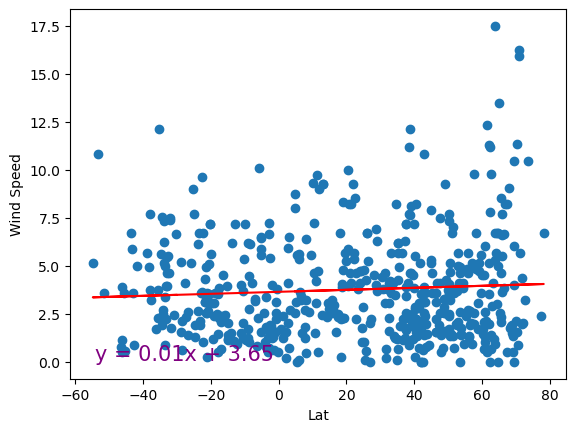

In [91]:
qqq = lin_reg(city_data_df['Lat'],city_data_df['Wind Speed'])
qqq[0].annotate(qqq[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="purple")
qqq[3].remove()
qqq[2]

In [69]:
type(qqq)

matplotlib.axes._subplots.AxesSubplot

In [78]:

plt.show(qqq[0])

In [52]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,dakar,14.6937,-17.4441,294.64,88,97,3.09,SN,1676240940
5,tortoli,39.9256,9.6572,280.05,81,0,7.20,IT,1676240791
6,nanortalik,60.1432,-45.2371,266.23,66,100,4.50,GL,1676241087
7,kholtoson,50.2981,103.3097,250.84,94,7,1.72,RU,1676241088
8,yabrud,33.9674,36.6574,271.65,83,45,1.35,SY,1676241088


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [51]:
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cidreira,-30.1811,-50.2056,298.18,80,0,6.64,BR,1676241085
1,punta arenas,-53.1500,-70.9167,285.21,50,20,10.80,CL,1676241086
2,ghanzi,-21.5667,21.7833,296.39,36,90,3.10,BW,1676241086
4,airai,-8.9266,125.4092,289.96,91,98,1.73,TL,1676241087
9,bredasdorp,-34.5322,20.0403,296.91,57,100,2.17,ZA,1676241089


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6841244888250325


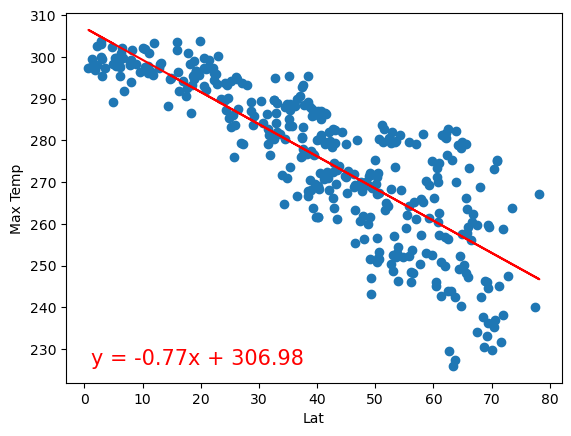

In [93]:
temp_lat_northern = lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
#do the below if the text overlaps with the dots
#xy = (x,y) is fractional. it determines where the function text shows
#so for bottom left, use 0.05,0.05.as_integer_ratio
#for top right, use .95,.95
#for bottom right, use .95,.05
#for top left, use .05,.95
temp_lat_northern[0].annotate(temp_lat_northern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
temp_lat_northern[3].remove()


The r-squared is: 0.18242504031239146


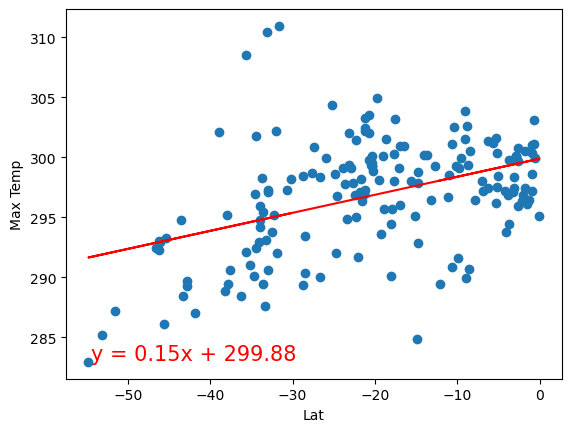

In [94]:
temp_lat_southern = lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
temp_lat_southern[0].annotate(temp_lat_southern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
temp_lat_southern[3].remove()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20026861840511337


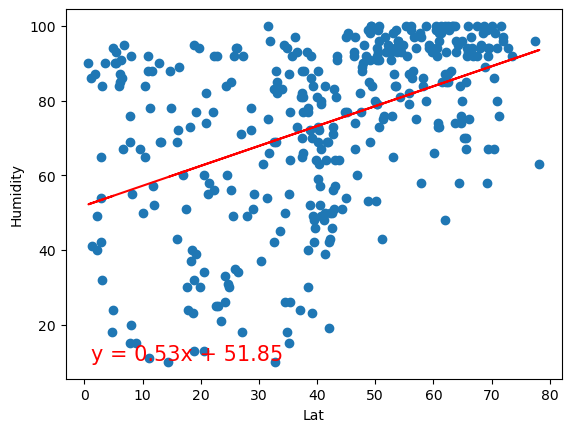

In [95]:
# Northern Hemisphere
# YOUR CODE HERE
humidity_lat_northern = lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
humidity_lat_northern[0].annotate(humidity_lat_northern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
humidity_lat_northern[3].remove()

The r-squared is: 0.1697673391491511


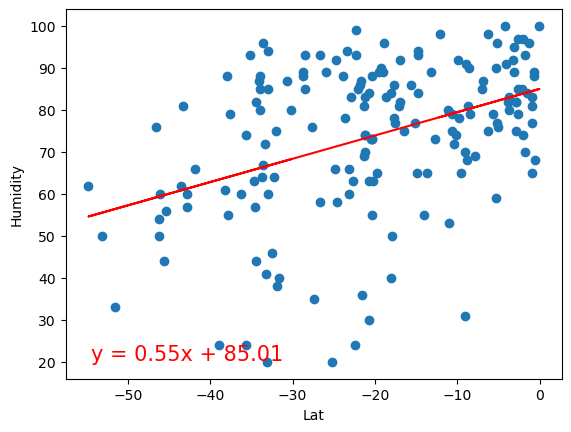

In [96]:
# Southern Hemisphere
# YOUR CODE HERE
humidity_lat_southern = lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
humidity_lat_southern[0].annotate(humidity_lat_southern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
humidity_lat_southern[3].remove()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05163745906748757


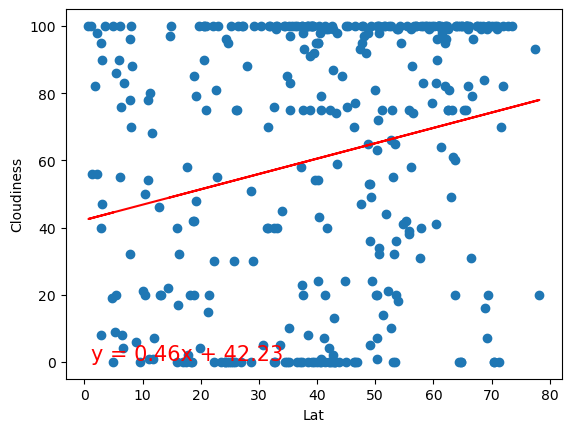

In [98]:
# Northern Hemisphere
# YOUR CODE HERE
cloud_lat_northern = lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
cloud_lat_northern[0].annotate(cloud_lat_northern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
cloud_lat_northern[3].remove()

The r-squared is: 0.12615968691790255


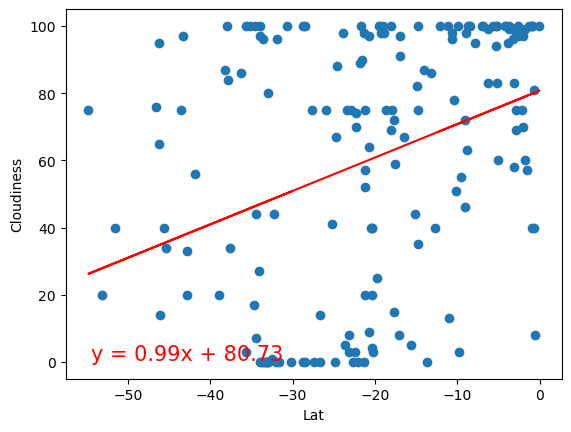

In [99]:
# Southern Hemisphere
# YOUR CODE HERE
cloud_lat_southern = lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
cloud_lat_southern[0].annotate(cloud_lat_southern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
cloud_lat_southern[3].remove()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00573427064640042


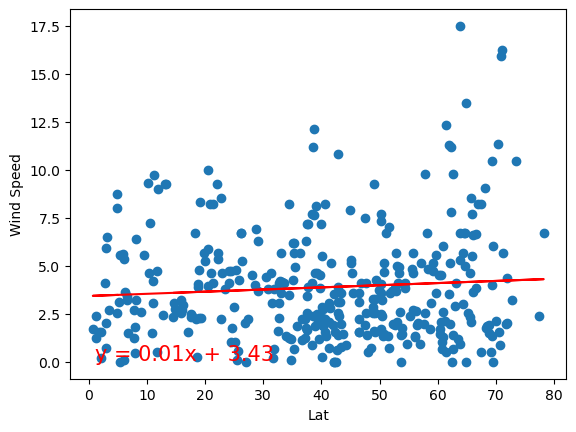

In [100]:
# Northern Hemisphere
# YOUR CODE HERE
wind_lat_northern = lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
wind_lat_northern[0].annotate(wind_lat_northern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
wind_lat_northern[3].remove()

The r-squared is: 0.05720899118751726


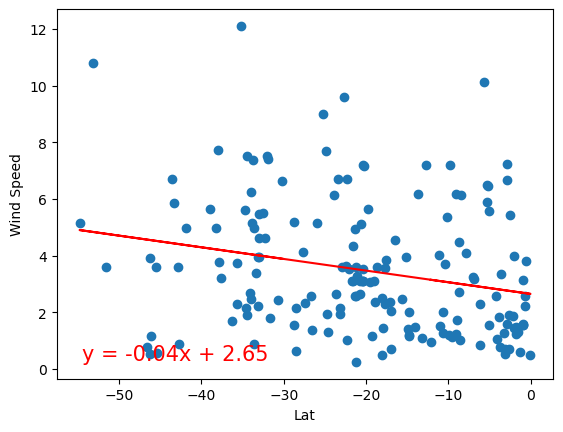

In [101]:
# Southern Hemisphere
# YOUR CODE HERE
wind_lat_southern = lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
wind_lat_southern[0].annotate(wind_lat_southern[1],xy=(0.05, 0.05), xycoords='axes fraction',fontsize=15,color="red")
wind_lat_southern[3].remove()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Temperature vs. Latitude Linear Regression Plot
- Northern Hemisphere - The Temperature vs. Latitude plot for this hemisphere looks to show an evident negative linear correlation. 
- Southern Hemisphere - The Temperature vs. Latitude plot for this hemisphere also appears to show an evident correlation but in this case it is positive linear correlation. 
    - This is not surprising as we would assume that the closer we get to the Equator (which is based on latitude and longitude being 0) that temperatures become warmer. 


Humidity vs. Latitude Linear Regression Plot
- Northern Hemisphere - The Humidty vs. Latitude plot for this hemisphere are showing a slight correlation but overall it appears hard to really claim a true relationship as the plot points are so spread out. The r-squared value of .2 indicates a weak positive linear relationship. 
- Southern Hemisphere - The Humidty vs. Latitude plot for this hemisphere is again showing a bit of a correlation but the plot points are spread out and clustered. The r-squared value of .17 indicates a weak positive linear relationship. 


Cloudiness vs. Latitude Linear Regression Plot
- Northern Hemisphere - The Cloudiness vs. Latitude plot for this hemisphere appears to show weak relationship between cloudiness and latitude. The r-squared of .05 is low indicating a weak positive linear relationship. 
- Southern Hemisphere - The Cloudiness vs. Latitude plot for this hemisphere looks to show weak relationship between cloudiness and latitude. The r-squared of .13 is low indicating a weak positive linear relationship.
    

Wind Speed vs. Latitude Linear Regression Plot
- Northern Hemisphere - The Wind Speed vs. Latitude plot for this hemisphere has an almost straight line for the linear regression. The r-squared value is very low at .005 which reveals that the data is showing no real relationship between latitude and wind speed. 
- Southern Hemisphere - The Wind Speed vs. Latitude plot for this hemisphere appears to show an ever so slightly negative relationship. The low r-squared value of .05 indicates a weak relationship between latitude and wind speed. 
    